<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2024/25 Term 2
</div>

# CS105 Group Project Submission (Final)

-----

Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.

Include both Part I and Part II to produce a self-contained notebook. You may fine-tune Part I codes and/or findings based on feedback received on Part I submission.

-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section:   G5
#### Team:      T1
#### Members:
1. Zachary Tay
2. Bryan Lee
3. Ang Qi Long
4. Jonathan Wong
5. Swayam Jain

#### Dataset: Employee

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import math
import seaborn as sns

df = pd.read_csv('employee.csv')

<a id="menu"></a>
### Table of Content

#### [Part 1: EDA](#phase1)
1. [Overview of Dataset](#part1)
2. [Data Pre-processing](#part2)
3. [Exploratory Analysis and Visualization](#part3)
#### [Part 2: Modeling](#phase2)
1. [Problem Formulation](#part4)
2. [Model Training](#part5)
3. [Model Evaluation and Selection](#part6)
4. [Findings and Conclusion](#part7)
5. [Non-technical Protocol](#part8)

<a id="phase1"></a>
## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

<a id="part1"></a>
### 1. Overview of dataset [15% of Part I]
a. [Background](#part1a) <br>
b. [Size](#part1b) <br>
c. [Variables](#part1c)

_[(Back Top)](#menu)_

#### **a.** Summarise the background of the dataset [limited to 50 words]

<div style="text-align: justify;">
This dataset contains <b>HR data of all employees under a sales team</b>. The data includes <b>personal and employment details</b>, <b>total career sales acquired</b> and <b>latest quarterly rating</b>. An employee’s data is <b>captured at the beginning of each month</b>, either <b>up to the latest month</b> (Dec 2017) or <b>when they quit</b>.
</div>


#### **b.** State the size of the dataset <a id="part1b"></a>

**Size**
- **Rows**: 2381
- **Columns**: 13


In [ ]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

[(Back)](#part1)

#### **c.** For each variable, describe what it represents and its data type (numerical or categorical) <a id="part1c"></a> 

**Date**
- **Type**: Categorical (Ordinal)<br>
- **Info**: The date when an employee's data is recorded 

**Emp_ID**
- **Type**: Categorical (Nominal)<br>
- **Info**: The unique ID of an employee

**Age**
- **Type**: Numerical (Discrete)<br>
- **Info**: The age of an employee
  
**Gender**
- **Type**: Categorical (Nominal)<br>
- **Info**: An employee’s gender (Male or Female)

**City**
- **Type**: Categorical (Nominal)<br>
- **Info**: The city where an employee works in (C1, C2, ..., C29)

**Education**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Highest education of an employee (College, Bachelor, Master)

**Salary**
- **Type**: Numerical (Discrete)<br>
- **Info**: Current salary of an employee, excluding bonus 

**Join_Date**
- **Type**: Categorical (Ordinal)<br>
- **Info**: The date when an employee joins the company

**Last_Work_Date**
- **Type**: Categorical (Ordinal)<br>
- **Info**: The data when an employee leaves the company, otherwise empty if employee has not quit

**Join_Designation**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Designation level when an employee joined the company (1, 2, 3, 4, 5)

**Designation**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Current designation level of an employee (1, 2, 3, 4, 5)

**Total_Sales_Accquired**
- **Type**: Numerical (Discrete)<br>
- **Info**: Total sales generated by an employee since joining the team

**Quarterly_Rating**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Last quarterly performance rating of an employee (1, 2, 3, 4)


[(Back)](#part1) <a id="part2"></a>

*****
### 2. Data pre-processing [35% of Part I]
a. [Missing Data](#part2a) <br>
b. [Outlier](#part2b) <br>
c. [Encoding](#part2c)                                   

_[(Back Top)](#menu)_

#### **a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made. <a id="part2a"></a> 

| Variable w/ Missing Data | Count | Percentage |
| :---------------- | :------: | ----: |
| Join_Date | 118 | 4.96% |
| Last_Work_Date | 765 | 32.13% |
| Join_Designation | 105 | 4.41% |  



In [ ]:
def displayMissing() :
    missing_count = df.shape[0] - df.count()              # total rows - rows with non-null values
    missing_percent = (missing_count / df.shape[0] * 100) # missing rows / total rows

    missing_data = pd.DataFrame({'Count': missing_count, 'Percentage': round(missing_percent,2)})
    missing_data = missing_data[missing_data['Count'] > 0]  # filter out variable w/o missing data

    return missing_data

displayMissing()

##### **Join Date**


- **Resolution**: Drop all rows with missing `Join_Date`
- **Reason**: As data of an employee is updated every month, there is no past record to check for their join date. We therefore cannot reasonably ascertain when they joined the sales team. Additionally, as the duration of employement will impact other variables and the percentage of missing data is not too high (4.96%), we opted to drop these rows with missing `Join_Date`
- **Assumption(s)**:
    - Each employee will only have one Emp_ID unique to them
    - An employee who had quit will not join the sales team again nor gain a new Emp_ID

In [ ]:
df.dropna(subset=['Join_Date'], inplace = True)         # drop all rows with null values under Join_Date
displayMissing()                                        # Join_Date count is 0 (LWD & JD are affected)

##### **Last Work Date**


- **Resolution**: For rows with missing `Last_Work_Date`,
    - If `Date` is before 1/12/2017, drop rows
    - If `Date` is 1/12/2017, impute rows with 31/12/2017
- **Reason**: 
    - For rows before Dec 2017, an older `Date` suggests that the employee is no longer with the sales team. The employee may quit on anyday within a given month and make any number of sales in that period too, thus affecting the other variables. As we again cannot reasonably ascertain when the employee quit and number of affected is not too high (24, 1.06%), we opted to drop these rows with missing 'Last_Work_Date`
    - For rows during Dec 2017, `Last_Work_Date` being blank indicates that the employee has not quit in that given month. As such, we can state that the date they last worked (or are employed) is 31 Dec 2017 and opted to impute with this date.
- **Assumption(s)**: 
    - There are no other employees will quit during Dec 2017 beyond those given in the dataset 

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

unknownLastDate = df[(df['Last_Work_Date'].isnull()) & (df['Date'] < '2017-12-01')].shape[0]
print("Unknown Last Date:", unknownLastDate, round(unknownLastDate / df.shape[0] * 100, 2), "%")

stillWorking = df[(df['Last_Work_Date'].isnull()) & (df['Date'] == '2017-12-01')].shape[0]
print("Still Working:", stillWorking, round(stillWorking / df.shape[0] * 100, 1), "%")

In [ ]:
unknownLastDate = df[(df['Last_Work_Date'].isnull()) & (df['Date'] < '2017-12-01')]     # splice out rows where Date is before Dec 2017
df.drop(unknownLastDate.index, inplace=True)                                            # use index of unknownLastDate and drop row

df.fillna({"Last_Work_Date": "31/12/2017"}, inplace=True)                               # impute rows of employees still working with sales team
                                                                                        # with last day of month (31 Dec 2017)

displayMissing()                                                                        # Last_Work_Date is 0 (JD affected)

##### **Join Designation**


- **Resolution**: For rows with missing `Join_Designation`, 
    - If `Designation == 1`, impute rows with 1
    - If `Designation > 1`, drop these rows
- **Reason**: 
    - As `Designation` captures the current designation level of an employee when their data was recorded, if current designation level is 1, then we can definitvely deduce that the `Join_Designation` is 1 too. 
    - For any higher current designation level than 1, we again cannot reasonably ascertain their initial designation level as it likely varies with other variables. As the number and percentage of rows missing data where `Designation > 1`  is not too high (78, 3.48%), we opted to drop these rows and impute those where where `Designation == 1` is 1 (22, 0.983%) with 1  
- **Assumption(s)**: -  

In [ ]:
cdIs1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] == 1)].shape[0]
cdNot1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] != 1)].shape[0]

print("(Current) Designation = 1:", cdIs1, round(cdIs1 / df.shape[0] * 100, 3), "%")
print("(Current) Designation > 1:", cdNot1, round(cdNot1 / df.shape[0] * 100, 2), "%")

In [ ]:
cdNot1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] != 1)]   # splice out rows where designation > 1
df.drop(cdNot1.index, inplace=True)                                         # use index of cdNot1 and drop row
# print(cdNot1.shape[0])

cdIs1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] == 1)]    # splice out rows where designation is 1
# print(cdIs1.iloc[cdIs1[cdIs1["Emp_ID"]==21].index])
df.loc[cdIs1.index, "Join_Designation"] = 1                                 # use index of cdIs1 and impute row with 1
# print(cdIs1.shape[0])
# print(df.iloc[df[df["Emp_ID"]==21].index])

df['Join_Designation'] = df['Join_Designation'].astype(int)                 # convert imputed float (1.0) to int (1)
# print(df.iloc[df[df["Emp_ID"]==21].index])
displayMissing()                                                            # Join_Designation count is 0

**Size after Cleaning**
- **Rows**: 2161
- **Columns**: 13

In [ ]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

[(Back)](#part2)

#### **b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made. <a id="part2b"></a> 

##### **Age**


There exists 33 outlier rows with `Age` above upper bound.
- **Resolution**: Remove the row with the outlier with the employee of the oldest age.
- **Reason**: This outlier is siginficantly further away from the rest of the cluster
- **Assumption(s)**: 
    - An employee is not forced to quit or retire once they reach a certain age

In [ ]:
# Identify outliers
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
lower = Q1 - 1.5 * (Q3-Q1)                          # lower bound is 17 years old                
upper = Q3 + 1.5 * (Q3-Q1)                          # upper bound is 49 years old

below = df[df['Age'] <= lower].shape[0]
above = df[df['Age'] >= upper].shape[0]

print(f"Rows below lower bound ({int(lower)}): {below}")
print(f"Rows below upper bound ({int(upper)}): {above}")

plt.figure(figsize=(20,5))
df[["Age"]].boxplot()
plt.title("Age")
plt.ylabel("Years")
plt.show()

In [ ]:
# Drop the oldest person
max_age = df.Age.max()
age_outlier = df[df["Age"] == max_age]
age_outlier
df.drop(age_outlier.index, inplace=True)

##### **Salary**


There exists 50 outlier rows with `Salary` above upper bound.
- **Resolution**:
    - Drop the 3 outliers separated from the cluster
    - Keep the outliers within the cluster
- **Reason**:
    - As there is only 3 such outliers that are much further away from the rest of the points, we opted to drop them.
    - Likely corresponds to employee with higher designation level. As such, we should keep these outliers for our data analysis
- **Assumption(s)**: -

In [ ]:
# Identify outliers for salary

Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
lower = Q1 - 1.5 * (Q3-Q1)                          # lower bound is $-16409.25                
upper = Q3 + 1.5 * (Q3-Q1)                          # upper bound is $129844.75

below = df[df['Salary'] <= lower].shape[0]
above = df[df['Salary'] >= upper].shape[0]

print(f"Rows below lower bound (${lower}): {below}")
print(f"Rows below upper bound (${upper}): {above}")

plt.figure(figsize=(20,5))
df[["Salary"]].boxplot()
plt.ylabel("Dollars ($)")
plt.show()

df.sort_values('Salary', ascending=False)[["Emp_ID", "Salary"]].head(5)

In [ ]:
# Drop the 3 outliers
top_3_outliers = df.sort_values("Salary", ascending=False).head(3)
df.drop(top_3_outliers.index, inplace=True)

##### **Last Work Date**


There exists 256 rows where the month of `Last_Work_Date` is different from that of `Date`.
- **Resolution**: Keep these outlier rows
- **Reason**: It is possible for an employee to quit days after when they last worked. As the number of rows is large (256), we opted to keep these outliers.
- **Assumption(s)**:
    - An employee may officially quit after a maximum of 3 days after they last worked"

In [ ]:
df['Last_Work_Date'] = pd.to_datetime(df['Last_Work_Date'], dayfirst=True)
conditions = [['2015-12-31', '2016-01-01'], ['2016-01-31', '2016-02-01'], ['2016-02-29', '2016-03-01'], ['2016-03-31', '2016-04-01'], 
              ['2016-04-30', '2016-05-01'], ['2016-05-31', '2016-06-01'], ['2016-06-30', '2016-07-01'], ['2016-07-31', '2016-08-01'], 
              ['2016-08-31', '2016-09-01'], ['2016-09-30', '2016-10-01'], ['2016-10-31', '2016-11-01'], ['2016-11-30', '2016-12-01'], 
              ['2016-12-31', '2017-01-01'], ['2017-01-31', '2017-02-01'], ['2017-02-28', '2017-03-01'], ['2017-03-31', '2017-04-01'], 
              ['2017-04-30', '2017-05-01'], ['2017-05-31', '2017-06-01'], ['2017-06-30', '2017-07-01'], ['2017-07-31', '2017-08-01'], 
              ['2017-08-31', '2017-09-01'], ['2017-09-30', '2017-10-01'], ['2017-10-31', '2017-11-01'], ['2017-11-30', '2017-12-01']]
    
total = 0
for lwd, rd in conditions:
    conflicts = df[df["Last_Work_Date"] <= lwd]
    conflicts = conflicts[conflicts["Date"] == rd]

    count = conflicts.sort_values(by="Last_Work_Date").shape[0]
    earliest_date = conflicts.Last_Work_Date.min(0).strftime('%d %b')
    latest_date = conflicts.Last_Work_Date.max(0).strftime('%d %b')

    print(f"Date: {rd} | Last work in previous month: {count}")
    print(f" >>> From {earliest_date} to {latest_date}")
    total += count
        
print("\nAffected Rows:",total)

##### **Total Sales Acquired**


There exists 10 rows with negative `Total_Sales_Acquired`.
- **Resolution**: Drop such rows with negative `Total_Sales_Acquired`
- **Reason**: Total sales acquired should minimally be 0, not negative. We should not absolute these negative values or impute with 0 as we cannot reasonably ascertain true total sales.
- **Assumption(s)**:
    - Dataset does not keep track whether an employee caused a loss of sales

There exists 307 outlier rows with `Total_Sales_Acquired` above upper bound.
- **Resolution**: Drop the top 3 rows that have outliers.
- **Reason**: These outliers are siginficantly further away from the rest of the data points, hence, we have decided to drop them. 
- **Assumption(s)**: -

In [ ]:
Q1 = df["Total_Sales_Acquired"].quantile(0.25)
Q3 = df["Total_Sales_Acquired"].quantile(0.75)
lower = Q1 - 1.5 * (Q3-Q1)                          # lower bound is                 
upper = Q3 + 1.5 * (Q3-Q1)                          # upper bound is 

negative = df[df['Total_Sales_Acquired'] < 0].shape[0]
below = df[df['Total_Sales_Acquired'] <= lower].shape[0]
above = df[df['Total_Sales_Acquired'] >= upper].shape[0]

print(f"Rows with negative sales: {negative}");
print(f"Rows below lower bound ({lower}): {below}")
print(f"Rows below upper bound ({upper}): {above}")

plt.figure(figsize=(20,5))
df[["Total_Sales_Acquired"]].boxplot()
plt.ylabel("Sales (x10^8)")
plt.show()

df.sort_values('Total_Sales_Acquired', ascending=False)[["Emp_ID", "Total_Sales_Acquired"]].head(5)

In [ ]:
# Drop rows with negative sales
negativeSales = df[df['Total_Sales_Acquired'] < 0]  
df.drop(negativeSales.index, inplace=True)

In [ ]:
# Drop the 3 outliers
top_3_outliers = df.sort_values("Total_Sales_Acquired", ascending=False).head(3)
df.drop(top_3_outliers.index, inplace=True)

**Size after Handling Outliers**
- **Rows**: 2144
- **Columns**: 13

In [ ]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

[(Back)](#part2)

#### **c.** For categorical variables, perform the necessary encoding. <a id="part2c"></a>

##### **Emp ID, Join Designation, Designation, Quarterly Rating** <a id="part2c1"></a>

These categorical variables are stored as `int` and therefore need not be encoded.

##### **Gender**

Binary (nominal) variable; To apply binary encoding 
|Value|Encoded|
|:-:|:-:|
|Male|0|
|Female|1|

In [ ]:
gender_encoding = {"Male":0, "Female":1} 
df["Gender_Encoded"] = df["Gender"].map(gender_encoding)        # map Gender column using encoding

df[["Date", "Emp_ID", "Gender", "Gender_Encoded"]].sample(5)

##### **City**

Ordinal variable; To apply ordinal encoding

Extract city number
|Value|Encoded|
|:-:|:-:|
|C1|1|
|C2|2|
|...|...|
|C28|28|
|C29|29|

In [ ]:
city_encoding = {"C1":1, "C2":2, "C3":3, "C4":4 ,"C5":5 ,"C6":6,"C7":7,"C8":8,"C9":9,"C10":10,"C11":11, "C12":12, "C13":13, "C14":14, "C15":15 ,"C16":16 ,"C17":17,"C18":18,"C19":19,"C20":20,"C21":21,"C22":22, "C23":23, "C24":24, "C25":25, "C26":26 ,"C27":27 ,"C28":28,"C29":29}

df["City_Encoded"] = df["City"].map(city_encoding)              #map City column using encoding

df[["Date", "Emp_ID", "City", "City_Encoded"]].sample(5)


##### **Education**

Ordinal variable; To apply ordinal encoding
|Value|Encoded|
|:-:|:-:|
|College|0|
|Bachelor|1|
|Master|2|

In [ ]:
education_encoding = {"College":0, "Bachelor":1, "Master":2} 
df["Education_Encoded"] = df["Education"].map(education_encoding)  # map Gender column using encoding

df[["Date", "Emp_ID", "Education", "Education_Encoded"]].sample(5)

##### **Date**

Convert date string to pandas Timestamp <br>
Splice month and year from `Date`<br>
Day is not needed as data is always captured at beginning of each month (i.e. 1st)

In [ ]:
# df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # already converted above

df["Recorded_Month"] = df['Date'].dt.month
df["Recorded_Year"] = df['Date'].dt.year

df[["Date", "Emp_ID", "Recorded_Month", "Recorded_Year"]].sample(5)

##### **Join Date**

Convert date string to pandas Timestamp <br>
Splice day, month and year from `Join_Date`<br>

In [ ]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'], dayfirst=True)  

df["Join_Day"] = df['Join_Date'].dt.day
df["Join_Month"] = df['Join_Date'].dt.month
df["Join_Year"] = df['Join_Date'].dt.year

df[["Emp_ID", "Join_Date", "Join_Day", "Join_Month", "Join_Year"]].sample(5)

##### **Last Work Date**

Convert date string to pandas Timestamp <br>
Splice day, month and year from `Last_Work_Date`<br>

In [ ]:
# df['Last_Work_Date'] = pd.to_datetime(df['Last_Work_Date'], dayfirst=True)    # already converted above

df["LWD_Day"] = df['Last_Work_Date'].dt.day
df["LWD_Month"] = df['Last_Work_Date'].dt.month
df["LWD_Year"] = df['Last_Work_Date'].dt.year

df[["Emp_ID", "Last_Work_Date", "LWD_Day", "LWD_Month", "LWD_Year"]].sample(5)

[(Back)](#part2)

----
### 3.	Exploratory analysis and visualization [50% of Part I] <a id="part3"></a>
a. [Summary Statistics](#part3a) <br>
b. [Visualisaton](#part3b) <br>
c. [Bi-Variate Analysis](#part3c)

_[(Back Top)](#menu)_

#### **a.** For each variable, provide relevant summary statistics <a id="part3a"></a>

In [ ]:
def displayCategorical(column):
    value_counts = df[column].value_counts()
    percentage = (value_counts / df.shape[0]) * 100

    col_data = pd.DataFrame({'Count': value_counts.values, 'Percentage': round(percentage, 2)})    
    return col_data.sort_index()

##### **Date**

In [ ]:
displayCategorical("Date")

##### **Emp_ID**

`Emp_ID` is an idenitifier and is unique across all 2144 rows

In [ ]:
unique_count = df.Emp_ID.nunique()
n_rows, n_cols = df.shape
print(f"# unique employee IDs : {unique_count}")
print(f"# rows : {n_rows}")

##### **Age**

In [ ]:
df[["Age"]].describe()

##### **Gender**

In [ ]:
displayCategorical("Gender")

##### **City**

In [ ]:
unique_count = df.City.nunique()
print(f"# unique cities : {unique_count}")

value_counts = df["City"].value_counts()                # Cannot sort normally by City(str) as "C10" < "C2" 
percentage = (value_counts / df.shape[0]) * 100

col_data = pd.DataFrame({'Code':df["City_Encoded"].value_counts().index,'Count': value_counts.values, 'Percentage': round(percentage, 2)})    
col_data.sort_values(by="Code").drop(columns=["Code"]) 

##### **Education**

In [ ]:
unique_count = df.Education.nunique()
print(f"# unique types of education : {unique_count}")

displayCategorical("Education")

##### **Salary**

In [ ]:
df[["Salary"]].describe()

##### **Join Date**

In [ ]:
unique_count = df.Join_Date.nunique()
print(f"# unique join dates : {unique_count}")
print()

classes = df.Join_Date.unique()
print(f"Values of join dates : {classes}")

all_join_dates = df.Join_Date.mode()[0]  # note that .mode() returns a series so we need to access the first element using [0]
df.Join_Date.value_counts()  # do a count to verify the mode

##### **Last Work Date**

In [ ]:
unique_count = df.Last_Work_Date.nunique()
print(f"# unique last work dates : {unique_count}")
print()

classes = df.Last_Work_Date.unique()
print(f"Values of last work dates : {classes}")

all_join_dates = df.Last_Work_Date.mode()[0]  # note that .mode() returns a series so we need to access the first element using [0]
df.Last_Work_Date.value_counts()  # do a count to verify the mode

##### **Join Designation**

In [ ]:
unique_count = df.Join_Designation.nunique()
print(f"# unique types of join designations : {unique_count}")

displayCategorical("Join_Designation")

##### **Designation**

In [ ]:
unique_count = df.Designation.nunique()
print(f"# unique types of designations : {unique_count}")

displayCategorical("Designation")

##### **Total Sales Acquired**

In [ ]:
df[["Total_Sales_Acquired"]].describe()

##### **Quarterly Rating**

In [ ]:
unique_count = df.Quarterly_Rating.nunique()
print(f"# unique types of ratings : {unique_count}")

displayCategorical("Quarterly_Rating")

[(Back)](#part3)

#### **b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made. <a id="part3b"></a>

##### **Date**

- **Key Observation(s)**:
    - Dec 2017 has the most data recorded as it includes those of employees that are still working (663) and have quit (72)
    - Other dates being non-zero are due to employees who had quit within that month

In [ ]:
stillWorking = df[(df['Last_Work_Date']=="31/12/2017")].shape[0]
dec2017 = df[(df['Date']=="2017-12-01")].shape[0]
print(f"Still Working in Dec 2017: {stillWorking}")
print(f"Quit in Dec 2017: {dec2017-stillWorking}")

date_data = df["Date"].value_counts(normalize=False)
date_level = date_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(date_level, date_data, width=20)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Date", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.xticks(date_level, date_level.strftime('%b %Y'), rotation=90, fontsize=10)
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

##### **Emp ID**

- **Key Observation(s)**:
    - Interval between Emp_ID is not always 1, possibly suggesting a loss of data for these employees

In [ ]:
unique_count_emp = df.Emp_ID.nunique()
n_rows = df.shape[0]

print(f"# Total unique Emp_ID : {unique_count_emp}")
print(f"# Total Rows : {n_rows}")

df[df["Emp_ID"] < 500].Emp_ID.plot.line()

##### **Age**

- **Key Observation(s)**:
    - The distribution of Age is slightly right-skewed (more data above median)
    - Most age of employess are within range of 30 to 35

In [ ]:
# Boxplot
plt.figure(figsize=(20,5))
df[["Age"]].boxplot()
plt.title("Age", fontsize=15)
plt.ylabel("Years", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(20,5))
plt.title("Distribution by Age", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Num. of Employees", fontsize=12)
df["Age"].hist(bins=35)                         # max age:55, min age: 21
plt.show()

##### **Gender**

- **Key Observation(s)**:
    - There have been more males employees (59%) than female employees (41%)

In [ ]:
gender_data = df["Gender"].value_counts(normalize=False)
gender_level = gender_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(gender_level, gender_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Gender", fontsize=15)
plt.xlabel("Gender", fontsize=12)
# plt.xticks(gender_level, ['Male', 'Female'])
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

##### **City** 

- **Key Observation(s)**: 
    - City C20 has had the greatest number of employees, suggesting it is a significant location
    - The distribution across the other 28 cities appears relatively uniform

In [ ]:
city_data = df["City_Encoded"].value_counts(normalize=False)
city_level = city_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(city_level, city_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Cities", fontsize=15)
plt.xlabel("City No. ", fontsize=12)
plt.xticks(range(1, 30))
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

##### **Education**

- **Key Observation(s)**:
    - The distribution across the 3 education levels is balanced, with College having a slightly lower count

In [ ]:
education_data = df["Education"].value_counts(normalize=False)
education_level = education_data.index

plt.figure(figsize=(20, 5))
bars = plt.bar(education_level, education_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Education", fontsize=15)
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

##### **Salary**

- **Key Observation(s)**:
    - The distribution of Salary is right-skewed (more data above median)
    - There are many outliers above upper whisker, suggesting that a small portion of employees earn significantly higher salaries than the rest
    - Most salaries are within range of $40 000 to $60 000

In [ ]:
# Boxplot
plt.figure(figsize=(20,5))
df[["Salary"]].boxplot()
plt.title("Salary", fontsize=15)
plt.ylabel("$", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(20,5))
plt.title("Distribution by Salary", fontsize=15)
plt.xlabel("Salary ($)", fontsize=12)
plt.ylabel("Num. of Employees", fontsize=12)
df["Salary"].hist(bins=50)                      # max salary: $153766; min salary: $10747; each bin ~$2860
plt.show()

##### **Join Date**

- **Key Observation(s)**: 
    - The highest count of hirings occurs near the end of the month (28th-109, 29th-91, 30th-103)
    - The lowest count of hirings occurs just before days with highest count (24th-42, 26th-40, 27th-46)
        <br><br>
    - The frequency of hirings is at its lowest from Apr 2010 to Apr 2012
    - There have hirings every month since May 2015, up to Dec 2017
    - The number of hirings increased significantly during May 2015 (88)
    - Since May 2015, the number of hirings are greater than those prior, except from Feb 2016 to May 2016
    - May 2017 had the most hirings in a given month (104)

In [ ]:
jd_count = df.Join_Date.nunique()
print(f"# unique join dates  : {jd_count}")

# By Day
cols = ["Join_Day", "Join_Month", "Join_Year"]
xaxes = [np.arange(1,32,1), np.arange(1,13,1), np.arange(2010,2018,1)]
labels = ["Day", "Month", "Year"]
i = 0       #for i in range(3):

date_data = df[cols[i]].value_counts(normalize=False)
date_level = date_data.index

plt.figure(figsize=(10,5))
bars = plt.bar(date_level, date_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Join Date ("+labels[i]+")", fontsize=15)
plt.xlabel(labels[i], fontsize=12)
plt.xticks(xaxes[i]) 
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

# By Month, Year
date_data = df.groupby(df["Join_Date"].dt.to_period('M'))["Join_Date"].count()
date_level = date_data.index.to_timestamp()

plt.figure(figsize=(20,5))
bars = plt.bar(date_level, date_data, width=20)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Join Date (Month, Year)", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.xticks(date_level, date_level.strftime('%b %Y'), rotation=90, fontsize=10)
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()


##### **Last Work Date**

- **Key Observation(s)**: 
    - The trend of `Last_Work_Date` is similar to that of `Date`
    - The significant difference of 31 (Day graph) and Dec 2017 (Month, Year graph) is due to inclusion of people who did not quit during Dec 2017 (663)
    - The number of employees who last worked on the 31st & in Dec 2017 and quit are 17 & 56 respectively
    <br><br>
    - The highest & lowest **day** employees last worked are 29th & 26th respectively
    - In 2016, the highest & lowest **month** employees last worked are May & Jul respectively
    - In 2017, the highest & lowest **month** employees last worked are Jul & Aug respectively

In [ ]:
lwd_count = df.Last_Work_Date.nunique()
print(f"# unique last work date : {lwd_count}\n")

stillWorking = df[(df['Last_Work_Date']=="31/12/2017")].shape[0]
print(f"Still Working in Dec 2017: {stillWorking}")

# By Day
cols = ["LWD_Day", "LWD_Month", "LWD_Year"]
xaxes = [np.arange(1,32,1), np.arange(1,13,1), np.arange(2015,2018,1)]
labels = ["Day", "Month", "Year"]
i = 0           # for i in range(len(col)):

date_data = df[cols[i]].value_counts(normalize=False)
date_level = date_data.index

plt.figure(figsize=(10,5))
bars = plt.bar(date_level, date_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Last Work Date ("+labels[i]+")", fontsize=15)
plt.xlabel(labels[i], fontsize=12)
plt.xticks(xaxes[i]) 
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

# By Month, Year
date_data = df.groupby(df["Last_Work_Date"].dt.to_period('M'))["Last_Work_Date"].count()
date_level = date_data.index.to_timestamp()

plt.figure(figsize=(20,5))
bars = plt.bar(date_level, date_data, width=20)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Last Work Date (Month, Year)", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.xticks(date_level, date_level.strftime('%b %Y'), rotation=90, fontsize=10)
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

_(from above, for comparison)_
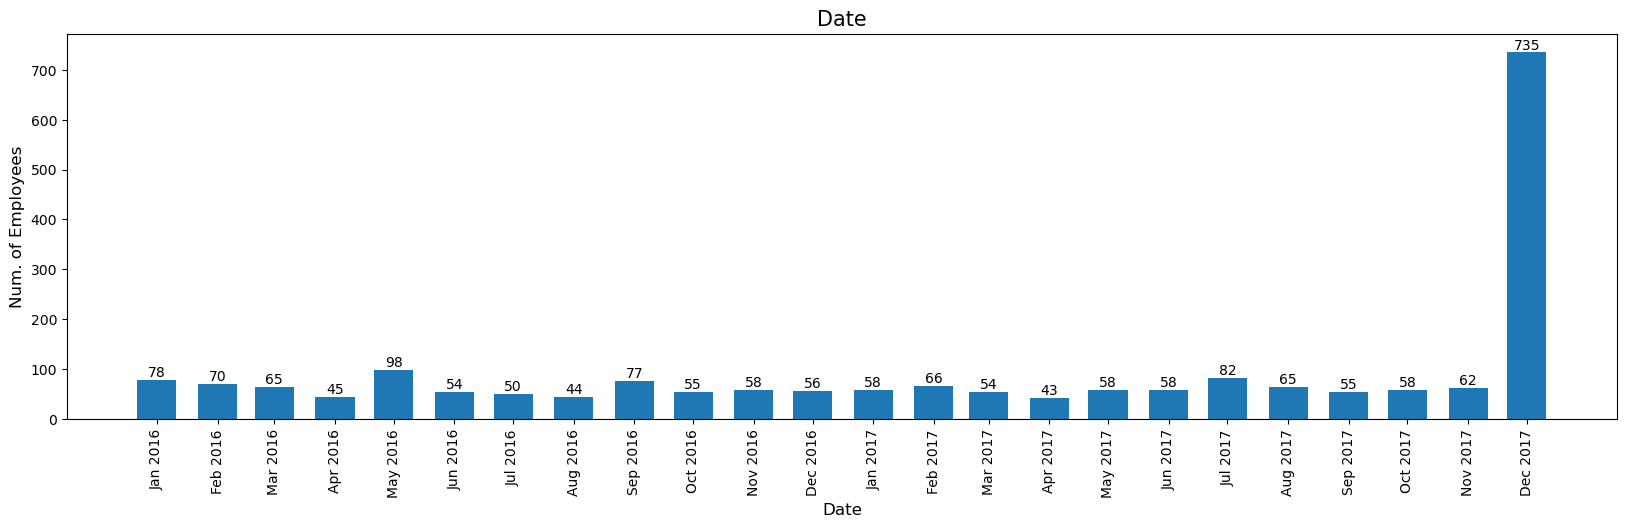

##### **Join Designation** 

- **Key Observation(s)**: 
    - Employees rarely join with designation level 4 or 5 (1.95%)
    - An employee mostly likely joins with designation level 1 (44.21%)
    - For each subsequent designation level, the employee count at that designation level decreases, with a significant drop between level 3 and 4 

##### **Designation**

- **Key Observation(s)**: 
    - There is a significant drop in the number of employees at level 1 (11.81%), suggesting a quarter of employees at level 1 were promoted
    - All other designation levels (2-5) have increased while following a similar trend as Join_Designation 
    - Designation level 3 has the greatest jump (5.02%)
    - Designation level 5 is still the smallest (0.98%), suggesting it is difficult to be promoted to level 5 

In [ ]:
plt.figure(figsize=(20,5)) 

jd_data = df["Join_Designation"].value_counts(normalize=True)
bars1 = plt.bar(jd_data.index - 0.2, jd_data, 0.4, label = 'First Joined') 

for bar in bars1:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1%}', ha='center', va='bottom', fontsize=10)

cd_data = df["Designation"].value_counts(normalize=True)
bars2 = plt.bar(cd_data.index + 0.2, cd_data, 0.4, label = 'Latest') 
  
for bar in bars2:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1%}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Designation Level", fontsize=12) 
plt.ylabel("Percentage", fontsize=12)  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.legend() 
plt.title("Employee's Designation", fontsize=15)
plt.show() 

##### **Total Sales Accquired**

- **Key Observation(s)**:
    - A significant number of employees (653) acquired 0 total sales such that the lower quantile and lower bound are both 0 & is observed in the normalised distribution
    - Among the outlier data
        - The majority are concentrated between upper bound (0.1x10^8) and 0.4x10^8 total sales
        - There is another grouping between 0.5x10^8 and 0.6x10^8 total sales
    - The distribution of Total Sales Accquired is right-skewed (more data above median)

In [ ]:
# Boxplot
plt.figure(figsize=(20,5))
df[["Total_Sales_Acquired"]].boxplot()
plt.title("Total Sales Acquired", fontsize=15)
plt.ylabel("Sales (x10^8)", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(20,5))
plt.title("Distribution by Total Sales Acquired", fontsize=15)
plt.xlabel("Sales (x10^8)", fontsize=12)
plt.ylabel("Num. of Employees", fontsize=12)
df["Total_Sales_Acquired"].hist(bins=50)    
plt.show()

# Log1p Histogram
plt.figure(figsize=(20,5))
plt.title("Normalised Distribution by Total Sales Acquired", fontsize=15)
plt.xlabel("Sales (x10^8)", fontsize=12)
plt.ylabel("Num. of Employees", fontsize=12)
log_totalSalesAcquired = np.log1p(df.Total_Sales_Acquired)
log_totalSalesAcquired.hist(bins=20)
plt.show()


##### **Quarterly Rating**

- **Key Observation(s)**: 
    - Follows a logarithmic decrease, with a significant drop between rating 1 and 2
    - The majority of employees are given a quarterly rating of 1, emphasising it is difficult to attain a higher rating

In [ ]:
qr_data = df["Quarterly_Rating"].value_counts(normalize=True)
qr_level = qr_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(qr_level, qr_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1%}', ha='center', va='bottom', fontsize=10)
    
plt.title("Employees' Quarterly Rating", fontsize=15)
plt.xlabel("Quarterly Rating", fontsize=10)
plt.xticks([1,2,3,4])
plt.ylabel("Percentage", fontsize=10)
plt.yticks(np.arange(0,0.9,0.1))
plt.show()

[(Back)](#part3)

#### **c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations. <a id="part3c"></a>

##### **Feature Creation**

##### **Age Class**


- **Reason**: We want to investigate whether an employee's age affects/is affected by other categorical variables
    - `Basic` -> Total sales that falls before 25th quantile<br>
    - `Moderate` -> Total sales that falls within interquartile range<br>
    - `High` -> Total sales that falls with 75th quantile and top whisker<br>
    - `Elite` -> Total sales that falls after top whisker<br>

In [ ]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
upper = Q3 + 1.5 * (Q3-Q1) 

def age_class(n):
    if n > upper:
        return "Oldest"
    elif n > Q3:
        return "Older"
    elif n < Q1:
        return "Younger"
    else:
        return "Average"
    
df["ageClass"] = df.Age.apply(age_class)
# df[["Emp_ID", "Age", "ageClass"]].head(10)

##### **Salary Class**


- **Reason**: We want to investigate whether an employee's salary affects/is affected by other categorical variables
    - `Low` -> Salaries that falls before 25th quantile<br>
    - `Average` -> Salaries that falls within interquartile range<br>
    - `High` -> Salaries that falls with 75th quantile and top whisker<br>
    - `Elite` -> Salaries that falls after top whisker<br>

In [ ]:
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)            
upper = Q3 + 1.5 * (Q3-Q1) 

def salary_class(n):  
    if n > upper:
        return "Elite"
    elif n > Q3:
        return "High"
    elif n < Q1:
        return "Low"
    else:
        return "Average"
    
df["salaryClass"] = df.Salary.apply(salary_class)
# df[["Emp_ID", "Salary", "salaryClass"]].head(10)

##### **Time Worked** <a id="part3ci"></a>


- **Reason**: We want to compute the number of days that an employee has worked for the sales team as it is more meaningful and useful to analyse its relationship with other variables

In [ ]:
df["Time_Worked"] = df["Last_Work_Date"] - df["Join_Date"]
df["Time_Worked"] = df["Time_Worked"].dt.days   # Convert Time_Worked from timedelta to number of days
# df[["Join_Date", "Last_Work_Date", "Time_Worked"]].head(10)

##### **Time Worked Class**


- **Reason**: We also want to categorise an employee's tenure to investigate its effects on other categorical variables
    - `Newcomer` -> Days employee has worked that falls before 25th quantile<br>
    - `Experienced` -> Days employee has worked that falls within interquartile range<br>
    - `Tenured` -> Days employee has worked that falls with 75th quantile and top whisker<br>
    - `Veteran` -> Days employee has worked that falls after top whisker<br>

In [ ]:
Q1 = df["Time_Worked"].quantile(0.25)
Q3 = df["Time_Worked"].quantile(0.75)    
upper = Q3 + 1.5 * (Q3-Q1) 

def tenure_class(n):  
    if n > upper:
        return "Veteran"
    elif n > Q3:
        return "Tenured"
    elif n < Q1:
        return "Newcomer"
    else:
        return "Experienced"
    
df["timeWorkedClass"] = df.Time_Worked.apply(tenure_class)
# df[["Emp_ID", "Time_Worked", "timeWorkedClass"]].head(10)


##### **Promotion**


- **Reason**: We want to check whether an employee has promoted from their initial designation and investigate whether this affects other variables

In [ ]:
df["Promotion"] = df["Designation"] - df["Join_Designation"]
# df[["Emp_ID","Join_Designation", "Designation", "Promotion"]].head(10)

##### **Sales Class**


- **Reason**: We want to investigate whether the total sales acquired by an employee affects/is affected by other categorical variables
    - `Basic` -> Total sales that falls before 50th quantile<br>
    - `Moderate` -> Total sales that falls within interquartile range<br>
    - `High` -> Total sales that falls with 75th quantile and top whisker<br>
    - `Elite` -> Total sales that falls after top whisker<br>

In [ ]:
Q2 = df["Total_Sales_Acquired"].quantile(0.5)
Q3 = df["Total_Sales_Acquired"].quantile(0.75)            
upper = Q3 + 1.5 * (Q3-Q1) 

def sales_class(n): 
    if n > upper:
        return "Elite"
    elif n > Q3:
        return "High"
    elif n < Q2:
        return "Basic"
    else:
        return "Moderate"
    
df["totalSalesAcquiredClass"] = df.Total_Sales_Acquired.apply(sales_class)
# df[["Emp_ID", "Total_Sales_Acquired", "totalSalesAcquiredClass"]].head(10)

##### _Helper Functions_

In [ ]:
def UCP_Col(X, table, total):
    count = 0

    for index in table.index:
        count += table.at[index, X]

    return count/total

def UCP_Row(Y, table, total):
    count = 0

    for col in table.columns:
        count += table.at[Y, col]

    return count/total

def displayProb(cols, rows, table_v, table_n, col_label, row_label):
    for y in rows:
        prob_y = UCP_Col(y, table_v, df.shape[0])
        print(f"P({row_label}={y}) = {prob_y}")

        for x in cols:
            prob_y_given_x = table_n.at[x,y]
            print(f" > P({row_label}={y} | {col_label}={x}) = {prob_y_given_x}")

        print()


##### **1. Age vs Salary**

- **Explanation**: We wanted to examine if older workers earn higher salaries than younger workers, due to the fact that they have more experience in the workforce.

- **Relationship**: 
    - As the correlation coefficient is 0.200, it suggests both are **dependent** and has **a positive correlation between both variables** - the older an employee is, the greater their expected salary is

    - However, as the correlation coefficient is **not close to 1**, it implies that an employee's age is **not the sole factor** in determining their salary.

    - Employees are most likely to have a salary between $20 000 to $60 000

In [ ]:
xs = df.Salary
ys = df.Age

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot of Age vs Salary", fontsize=15)
plt.xlabel("Salary", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

In [ ]:
corr_Age_Sal = np.corrcoef(xs, ys)[0][1]
cov_Age_Salary = np.cov(xs, ys)[0][1]
var_Sal = xs.var()
var_Age = ys.var() 

print(f"ρ                = {corr_Age_Sal}")       #Correlation Coefficient; p=0 -> independent
print(f"Cov(Age, Salary) = {cov_Age_Salary}")     #Cov(X,Y) = Cov(Y,X)
print(f"Var(Age)         = {var_Age}")
print(f"Var(Salary)      = {var_Sal}")

##### **2. City vs Salary**

- **Explanation**: We wanted to examine if the city employee works in affects how much they earn.
- **Relationship**: 
    - We can conclude that the **salary of an employee is generally dependent of the city an employee works in** as conditional probability is quite different as unconditional probability
        - ```P(Salary = Low | City = C11)``` and ```P(Salary = Low | Gender = C4)``` is different to ```P(Salary = Low)```
            - 9.8% and 37.5% different to 25% 
        - ```P(Salary = Average | City = C18)``` and ```P(Salary = Average | City = C11)``` is same/similar to ```P(Salary = Average)```
            - 34.4% and 60.7% == 50% 
        - ```P(Salary = High | City = C16)``` and ```P(Salary = High | City = C12)``` is same/similar to ```P(Salary = High)```
            - 13.3% and 30.6% == 22.9% 
        - ```P(Salary = Elite | City = C23)``` and ```P(Salary = Elite | City = C11)``` is same/similar to ```P(Salary = Elite)```
            - 0% and 4.9% == 2.1% 

In [ ]:
table_value2 = pd.crosstab(df.City, df.salaryClass)
table_norm2 = pd.crosstab(df.City, df.salaryClass, normalize="index")

display_values_2 = table_value2[["Low", "Average", "High", "Elite"]]
display_norm_2 = table_norm2[["Low", "Average", "High", "Elite"]]

display_values_2 = display_values_2.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly
display_norm_2 = display_norm_2.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly

display_values_2 = display_values_2.sort_values(by="City_Encoded").drop(columns="City_Encoded")
display_norm_2 = display_norm_2.sort_values(by="City_Encoded").drop(columns="City_Encoded")

display_values_2.set_index("City")
display_norm_2.set_index("City")

display(display_values_2)
display(display_norm_2)

In [ ]:
print(f"P(Salary=Low) = {UCP_Col("Low", display_values_2, df.shape[0])}")
print(f"P(Salary=Average) = {UCP_Col("Average", display_values_2, df.shape[0])}")
print(f"P(Salary=High) = {UCP_Col("High", display_values_2, df.shape[0])}")
print(f"P(Salary=Elite) = {UCP_Col("Elite", display_values_2, df.shape[0])}\n")

salaries = ["Low", "Average", "High", "Elite"]
cities = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 
          'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 
          'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29'][::5]

displayProb(cities, salaries, table_value2, table_norm2, "City", "Salary")

In [ ]:
table_norm2.plot.bar(stacked=True)

##### **3. Designation vs Salary** 

- **Explanation**: We wanted to examine if a higher designation equates to earning higher salaries.

- **Relationship**: 
    - We can conclude that the **salary of an employee is dependent on the employee's designation** as conditional probability is quite different from unconditional probability
        - ```P(Salary = Low | Designation=1) = 54.0%``` is different from ```P(Salary = Low) = 25%``` 
        - ```P(Salary = Elite | Designation=5) = 58.8%``` is different from ```P(Salary = Elite) = 2.1%``` 
    - We can also conclude it is **not necessarily true** that **a higher designation level affects the likelihood of having a better salary**
        - ```P(Salary = High | Designation=4) > P(Salary = High | Designation=3) and P(Salary = High | Designation=5)```
            - _78.7% > 51.7% and 35.2%_
    - Our hypothesis is generally true. People who are of designation 5 have approximately 58.9% if them earning very high salaries. Conversely, those who are of designations 1 and 2 mainly earn low to middle salaries.

In [ ]:
result = pd.crosstab(df.Designation, df.salaryClass, normalize="index")
result[["Low", "Average", "High", "Elite"]]

table_value3 = pd.crosstab(df.Designation, df.salaryClass)
table_norm3 = pd.crosstab(df.Designation, df.salaryClass, normalize="index")

display(table_value3[["Low", "Average", "High", "Elite"]])
display(table_norm3[["Low", "Average", "High", "Elite"]])

In [ ]:
salaries = ["Low", "Average", "High", "Elite"]
designations = [1,2,3,4,5]

displayProb(designations, salaries, table_value3, table_norm3, "Designation", "Salary")

In [ ]:
table_norm3.plot.bar(stacked=True)

##### **4. Education vs Join Designation**

- **Explanation**: We wanted to examine if a higher education is associared with a higher join designation when the employee first joins the company.
- **Relationship**:  
    - We can conclude that **an employee's join designation is independent of the employee's education** as conditional probability is the same/similar to unconditional probability
        - ```P(JoinDesignation=1 | Education="Master") = 44.5%``` is same/similar to ```P(JoinDesignation=1) = 44.2%``` 
        - ```P(JoinDesignation=4 | Education="Bachelor") = 1.2%``` is same/similar to ```P(JoinDesignation=4) = 1.6%``` 

    - Generally, it does not matter what each employee's education is.
    - No matter which education one attains, majority of the employees start with a join designation of 1, followed by 2. 
    - Only a small proportion of employee starts joining the company with starting positions of 4 (34) or 5 (7)

In [ ]:
table_value4 = pd.crosstab(df.Education, df.Join_Designation)
table_norm4 = pd.crosstab(df.Education, df.Join_Designation, normalize="index")

display(table_value4)
display(table_norm4)

In [ ]:
educations = ["College", "Bachelor", "Master"]
join_Designations = [1,2,3,4,5]

displayProb(educations, join_Designations, table_value4, table_norm4, "Education", "JoinDesignation")

In [ ]:
table_norm4.plot.bar(stacked=True)

##### **5. Age vs Designation**

- **Explanation**: We wanted to test if older workers will be assigned higher designations, since they have been there for longer periods of time.
- **Relationship**:
    - We can conclude that **an employee's latest designation is dependent on their age** as conditional probability is quite different from unconditional probability
        - ```P(Designation=1 | Age="Younger") = 51.8%``` is different from ```P(Designation=1) = 32.5%``` 
        - ```P(Designation=4 | Age="Oldest") = 1.4%``` is different from ```P(Designation=4) = 6.0%``` 

    - We can conclude that this trend is generally true.
    - From our results, if we randomly select an employee of category "older" or "oldest", we get approximately 0.133 and 0.136 probabilities that he/she is of designation 4 or 5.
    - Conversely, for if we randomly select an employee of category "younger" or "average", we get approximately 0.0160 and 0.0541 probabilities that he/she is of designation 4 or 5.
    - It is possible that older workers have higher designations.

In [ ]:
table_value5 = pd.crosstab(df.ageClass, df.Designation)
table_norm5 = pd.crosstab(df.ageClass, df.Designation, normalize="index")

display(table_value5)
display(table_norm5)

In [ ]:
designations = [1,2,3,4,5]
ages = ["Younger", "Average", "Older", "Oldest"]

displayProb(ages, designations, table_value5, table_norm5, "Age", "Designation")

In [ ]:
table_norm5.plot.bar(stacked=True)
df[['Age','Designation']].boxplot(by='Designation')
plt.show()

##### **6. City vs Promotion** 

- **Explanation**: We wanted to examine if people living in a certain cities get promoted faster than those living in other cities.
- **Relationship**:
    - We can conclude that **an employee's ability to promote is dependent on the city they work in** as conditional probability is quite different from unconditional probability
        - ```P(Promotion=0 | City=C1) = 70.6%``` is different from ```P(Promotion=0) = 83.5%``` 
        - ```P(Promotion=1 | City=C1) = 12%``` is different from ```P(Promotion=1) = 8.9%``` 

    - The probability of an employee promote by 3 or 4 designation levels is about 0.0210
    - The probabilities of an employee promote by 3 or 4 designation levels, given that they are from C1 and C4 are 0.0267 and 0.0278 respectively

In [ ]:
table_value6 = pd.crosstab(df.City, df.Promotion)
table_norm6 = pd.crosstab(df.City, df.Promotion, normalize="index")

display_values_6 = table_value6.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly
display_norm_6 = table_norm6.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly

display_values_6 = display_values_6.sort_values(by="City_Encoded").drop(columns="City_Encoded")
display_norm_6 = display_norm_6.sort_values(by="City_Encoded").drop(columns="City_Encoded")

display_values_6.set_index("City")
display_norm_6.set_index("City")

display(display_values_6)
display(display_norm_6)

In [ ]:
print(f"P(Promotion=0) = {UCP_Col(0, display_values_6, df.shape[0])}")
print(f"P(Promotion=1) = {UCP_Col(1, display_values_6, df.shape[0])}")
print(f"P(Promotion=2) = {UCP_Col(2, display_values_6, df.shape[0])}")
print(f"P(Promotion=3) = {UCP_Col(3, display_values_6, df.shape[0])}")
print(f"P(Promotion=4) = {UCP_Col(4, display_values_6, df.shape[0])}\n")

promotions = [0,1,2,3,4]
cities = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 
          'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 
          'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29'][::3]

displayProb(cities, promotions, table_value6, table_norm6, "City", "Promotion")

In [ ]:
table_norm6.plot.bar(stacked=True)

##### **7. Time Worked vs Promotion** 

- **Explanation**: We wanted to examine if people who work longer get promoted first.
- **Relationship**: 
    - We can conclude that **an employee's ability to promote is dependent on how long they worked for** as conditional probability is quite different from unconditional probability
        - ```P(Promotion=0 | TimeWorked="Veteran") = 19.1%``` is different from ```P(Promotion=0) = 83.5%``` 
        - ```P(Promotion=1 | TimeWorked="Experienced") = 2.0%``` is different from ```P(Promotion=1) = 8.9%```

    - We can conclude if an employee promotes by 3 or 4 designation levels, it is much more likely that he/she is a tenured or veteran.
    - The probability that an employee is a tenured or a veteran is 0.25 out of all the total employees.
    - However, if one is of promotions 3 or 4, the chances that he/she is a tenured or veteran is 0.974 and 1.0 respectively.
    - Hence, the hypothesis is correct.

In [ ]:
table_value7 = pd.crosstab(df.timeWorkedClass, df.Promotion)
table_norm7 = pd.crosstab(df.timeWorkedClass, df.Promotion, normalize="index")

display(table_value7)
display(table_norm7)

In [ ]:
promotions = [0,1,2,3,4]
timeWorkedClasses = ["Newcomer", "Experienced", "Tenured", "Veteran"]

displayProb(timeWorkedClasses, promotions, table_value7, table_norm7, "TimeWorked", "Promotion")

In [ ]:
table_norm7.plot.bar(stacked=True)

##### **8. Gender vs Sales** <a id="part3c8"></a>

- **Explanation**: We want to examine whether an employee's gender affects the sales acquired, possibly due to customer perception and such. This would help us better understand if gender plays a role in sales generated
- **Relationship**:
    - We can conclude that the **total sales generated is independent of the employee's gender** as conditional probability is the same as unconditional probability
        - ```P(Sales = Basic | Gender = Female)``` and ```P(Sales = Basic | Gender = Male)``` is same/similar to ```P(Sales = Basic)```
            - 48.4% and 51.1% == 50% 
        - ```P(Sales = Moderate | Gender = Female)``` and ```P(Sales = Moderate | Gender = Male)``` is same/similar to ```P(Sales = Moderate)```
            - 26.3% and 24.1% == 25% 
        - ```P(Sales = High | Gender = Female)``` and ```P(Sales = High | Gender = Male)``` is same/similar to ```P(Sales = High)```
            - 10.4% and 11.1% == 10.8% 
        - ```P(Sales = Elite | Gender = Female)``` and ```P(Sales = Elite | Gender = Male)``` is same/similar to ```P(Sales = Elite)```
            - 15.0% and 13.6% == 14.2% 

In [ ]:
table_value8 = pd.crosstab(df.Gender, df.totalSalesAcquiredClass)
table_norm8 = pd.crosstab(df.Gender, df.totalSalesAcquiredClass, normalize="index")

display(table_value8[["Basic", "Moderate", "High", "Elite"]])
display(table_norm8[["Basic", "Moderate", "High", "Elite"]])

In [ ]:
sales = ["Basic", "Moderate", "High", "Elite"]
genders = ["Female","Male"]

displayProb(genders, sales, table_value8, table_norm8, "Gender", "Sales")

In [ ]:
table_norm8.plot.bar(stacked=True)

##### **9. City vs Sales** <a id="part3c9"></a>

- **Explanation**: 
    - We want to examine whether the city an employee works at affects their total sales. 
    - City C20 would be significant as it has the most employees while other cities have a relatively balanced number of employees
    - Each city may be geographically dispositioned to have more customers and in turn affect total sales
- **Relationship**:
    - We can conclude that the **total sales generated is generally dependent of the city an employee works in** as conditional probability is quite different as unconditional probability
        - ```P(Sales = Basic | City = C22)``` and ```P(Sales = Basic | Gender = C14)``` is different to ```P(Sales = Basic)```
            - 38.2% and 56.8% different to 50% 
        - ```P(Sales = Moderate | City = C27)``` and ```P(Sales = Moderate | City = C22)``` is same/similar to ```P(Sales = Moderate)```
            - 17.1% and 34.2% == 25% 
        - ```P(Sales = High | City = C15)``` and ```P(Sales = High | City = C12)``` is same/similar to ```P(Sales = High)```
            - 3.4% and 18.4% == 10.8% 
        - ```P(Sales = Elite | City = C11)``` and ```P(Sales = Elite | City = C29)``` is same/similar to ```P(Sales = Elite)```
            - 6.2% and 25.6% == 14.2% 

In [ ]:
table_value9 = pd.crosstab(df.City, df.totalSalesAcquiredClass)
table_norm9 = pd.crosstab(df.City, df.totalSalesAcquiredClass, normalize="index")

display_values_9 = table_value9[["Basic", "Moderate", "High", "Elite"]]
display_norm_9 = table_norm9[["Basic", "Moderate", "High", "Elite"]]

display_values_9 = display_values_9.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly
display_norm_9 = display_norm_9.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly

display_values_9 = display_values_9.sort_values(by="City_Encoded").drop(columns="City_Encoded")
display_norm_9 = display_norm_9.sort_values(by="City_Encoded").drop(columns="City_Encoded")

display_values_9.set_index("City")
display_norm_9.set_index("City")

display(display_values_9)
display(display_norm_9)

In [ ]:
print(f"P(Sale=Basic) = {UCP_Col("Basic", table_value9, df.shape[0])}")
print(f"P(Sale=Moderate) = {UCP_Col("Moderate", table_value9, df.shape[0])}")
print(f"P(Sale=High) = {UCP_Col("High", table_value9, df.shape[0])}")
print(f"P(Sale=Elite) = {UCP_Col("Elite", table_value9, df.shape[0])}\n")

sales = ["Basic", "Moderate", "High", "Elite"]
cities = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 
          'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 
          'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29'][::3]

displayProb(cities, sales, table_value9, table_norm9, "City", "Sales")

In [ ]:
table_norm9.plot.bar(stacked=True)

##### **10. Time Worked vs Total Sales Acquired** <a id="part3c10"></a>

- **Explanation**: We expect that an employee who has worked for a longer time will have more opportunities to generate more sales. As such, we want to investigate the correlation between these two variables
- **Relationship**:
    - As the correlation coefficient is 0.688, it suggests both are **dependent** and has **a positive correlation between both variables** - the longer an employee has worked, the greater the total sales acquired
    - However, as the correlation coefficient is **not as close to 1**, it implies that how long an employee worked is **not the sole factor** in determining the sales acquired.


In [ ]:
xs = df.Time_Worked
ys = df.Total_Sales_Acquired

plt.figure(figsize=(8,5))

plt.scatter(xs,ys)
plt.title("Time_Worked vs TotalSalesAcquired", fontsize=15)
plt.xlabel("Time_Worked", fontsize=12)
plt.ylabel("TotalSalesAcquired", fontsize=12)
plt.show()

In [ ]:
corr_TW_TSA = np.corrcoef(xs, ys)[0][1]
cov_TW_TSA = np.cov(xs, ys)[0][1]
var_TW = xs.var()
var_TSA = ys.var() 

print(f"ρ                             = {corr_TW_TSA}")    #Correlation Coefficient
print(f"Cov(Time Worked, Total Sales) = {cov_TW_TSA}")     #Cov(X,Y) = Cov(Y,X)
print(f"Var(Time Worked)              = {var_TW}")
print(f"Var(Total Sales)              = {var_TSA}")

##### **11. Designation vs Quarterly Rating** 

- **Explanation**: 
    - We want to investigate whether the designation an employee holds have an impact on their ratings
    - A higher designation level generate biasness towards an employee's likelihood of receiving a greater rating
  
- **Relationship**:
    - We can conclude that the **rating attained is dependent on the employee's designation** as conditional probability is quite different from unconditional probability
        - ```P(Rating = 1 | Designation=4) = 52.5%``` is different from ```P(Rating = 1) = 73.5%``` 
        - ```P(Rating = 2 | Designation=4) = 36.1%``` is different from ```P(Rating = 2) = 15.2%``` 
    - We can also conclude it is **not necessarily true** that **a higher designation level affects the likelihood of attaing a rating greater than 1**
        - ```P(Rating = 3 | Designation=3) > P(Rating = 3 | Designation=2) and P(Rating = 3 | Designation=4)```
            - _8.5% > 6.8% and 8.2%_
        - ```P(Rating = 4 | Designation=3) > P(Rating = 4 | Designation=2) and P(Rating = 4 | Designation=4)```
            - _6.9% > 4.5% and 3.3%_

In [ ]:
table_value11 = pd.crosstab(df.Designation, df.Quarterly_Rating)
table_norm11 = pd.crosstab(df.Designation, df.Quarterly_Rating, normalize="index")

display(table_value11)
display(table_norm11)

In [ ]:
ratings = [1,2,3,4]
designations = [1,2,3,4,5]

displayProb(designations, ratings, table_value11, table_norm11, "Designation", "Rating")

In [ ]:
table_norm11.plot.bar(stacked=True)

##### **12. Sales vs Quarterly Rating** 

- **Explanation**: 
    - We want to verify that the quarterly rating given to an employee is dependent on their total sales made
    - We also want to investigate whether an employee who made more sales are more likely to attain a specific rating than those who made less sales
- **Relationship**:
    - We can conclude that the **rating attained is dependent on the total sales made** as conditional probability is quite different from unconditional probability
        - ```P(Rating = 1 | Total Sales is "Basic") = 97.9%``` is different from ```P(Rating = 1) = 73.5%``` 
        - ```P(Rating = 3 | Total Sales is "Elite") = 27.3%``` is different from ```P(Rating = 3) = 7.0%``` 
    - We can also conclude the second question is **valid** for **quarterly rating of 2, 3 and 4**, but **not for a rating for 1** where employees with "Basic" total sales acquired are mostly likely to attain this rating
        - ```P(Rating = 4 | Total Sales is "Elite") > P(Rating = 4 | Total Sales is "High") > P(Rating = 4 | Total Sales is "Moderate") > P(Rating = 4 | Total Sales is "Basic")```
            - _20.72% > 9.48% > 1.30% > 0.00%_
        <br><br>
        - ```P(Rating = 1 | Total Sales is "Elite") > P(Rating = 1 | Total Sales is "High") > P(Rating = 1 | Total Sales is "Moderate") > P(Rating = 1 | Total Sales is "Basic")```
            - _21.05% < 48.28% < 65.49% < 97.85%_

In [ ]:
table_value12 = pd.crosstab(df.totalSalesAcquiredClass, df.Quarterly_Rating)
table_norm12 = pd.crosstab(df.totalSalesAcquiredClass, df.Quarterly_Rating, normalize="index")

display(table_value12)
display(table_norm12)

In [ ]:
ratings = [1,3]    # [1,2,3,4]
sales = ['Basic','Moderate','High','Elite']

displayProb(sales, ratings, table_value12, table_norm12, "Sales", "Rating")

<br></br>
## Part II: Modeling [12% of final grade] <a id="phase2"></a>

### 1. Problem Formulation [15% of Part II] <a id="part4"></a>
a. [Problem Statements](#part4a) <br>
b. [Problem Selected](#part4b) <br>
c. [Dependent Variable](#part4c)

_[(Back Top)](#menu)_

#### **a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**. <a id="part4a"></a>

**Response.** 

#### **b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**. <a id="part4b"></a>

**Response.** 

#### **c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words** <a id="part4c"></a>

**Response.** 

---
### 2. Model Training [30% of Part II] <a id="part5"></a>
a. [Feature Selection](#part5a) <br>
b. [Train & Test Sets](#part5b) <br>
c. [Models](#part5c) <br>
d. [Training](#part5d)

_[(Back Top)](#menu)_

#### **a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis. <a id="part5a"></a>

##### **Date** & **Emp ID**

Both variables are indexes and would not have explanatory power in determining `Total_Sales_Acquired`

##### **Gender**

We concluded in [Part 1 (3C)](#part3c8) that `Total_Sales_Acquired` is **independent** of an employee's gender

##### **City**

We concluded in [Part 1 (3C)](#part3c9) that `Total_Sales_Acquired` is generally **dependent** on the city an employee works in, therefore, we will include `City` as a **feature**

##### **Join Date** & **Last Work Date** (_& **Time Worked**_)

Both variables are dates and we have [previously](#part3ci) created a more meaningful feature, `Time_Worked`, to represent the duration of employment (in days)

We concluded in [Part 1 (3C)](#part3c10) that `Total_Sales_Acquired` is **dependent** on an employee's duration of employment, therefore, we will include `Time_Worked` as a **feature**

##### **Education**, **Join Designation**, **Designation** & **Quarterly Rating**

These categorical variables have yet to be investigated for a potential relationship with `Total_Sales_Acquired`

We first want to exclude any variable with a dominant value because it is likely to have little explanatory power in determining `Total_Sales_Acquired`. The criteria to exclude a feature is if its mode has a frequency of more than 50%. 

**Conclusion:**
- Among the four categorical variables, we will **exclude** `Quarterly_Rating` (73.5%) and **keep** `Education` (33.7%), `Join_Designation` (44.2%) & `Designation` (35.4%). 

In [ ]:
categorical_candidates = ["Education", "Join_Designation", "Designation", "Quarterly_Rating"]
categorical_selected = []

row, col = 1, len(categorical_candidates)
fig, ax = plt.subplots(row, col, figsize=(15,4))

threshold = 0.5

for i in range(col):
    feature = categorical_candidates[i]
    norm_table = df[feature].value_counts(normalize=True)

    mode = norm_table.iloc[0]                                   # Find mode of variable
    if mode < threshold:                                        # Fulfill criteria to keep
        categorical_selected.append(feature)

    ax = plt.subplot(row,col,i+1)                               # Plot bar graph
    ax.set_title(f"{feature} (Mode: {round(mode*100,1)}%)")
    norm_table.plot(kind='bar')

print(f"Variables to Keep: {categorical_selected}")
plt.show()

We next want to look into how the 3 categorical variables are related to `Total_Sales_Acquired`. We will plot a grouped boxplot and observe the distribution of `Total_Sales_Acquired` across the 3 categorical variables.

**Observations:**:
- For `Designation`
    - Those at level 4 have a higher median `Total_Sales_Acquired` than those at other levels which have a similar median
    - The variability of `Total_Sales_Acquired` increases with each designation level
- For `Join_Designation`
    - ???
- For `Education`, it appears that there is no relationship with `Total_Sales_Acquired`

**Conclusion:** (???)
- We will only **keep** `Join_Designation` and/or `Designation` as a **feature**. As discussed [previously](#part2c1), there is no need to encode this/these variable(s) as it is/they are ordinal and are stored as `int`. 

In [ ]:
row, col = 1, len(categorical_selected)
fig, ax = plt.subplots(row, col, figsize=(20,5))

for i in range(col):
    feature = categorical_selected[::-1][i]
    ax = plt.subplot(row, col, i+1)
    df[[feature,'Total_Sales_Acquired']].boxplot(by=feature, ax=ax, rot=90)
    plt.suptitle("")
    ax.set_title(f"Total sales by {feature}")

# categorical_selected.remove("Join_Designation")
categorical_selected.remove("Education")

##### **Age** & **Salary**

These numerical variables have yet to be investigated for a potential relationship with `Total_Sales_Acquired`

We want to calculate if each variable is correlated with `Total_Sales_Acquired`. We will plot a correlation table and select the features if its correlation is at least 0.5. 

**Observation:**
- The correlation of `Age` (0.265) & the correlation of `Salary` (0.372) are much lower than that of `Time_Worked` (0.688) 

**Conclusion:**
- We will **exclude** `Age` and `Salary` as both variables fall below our threshold of 0.5.

In [ ]:
numerical_candidates = ["Age", "Salary"]
numerical_selected = []

threshold = 0.5

for feature in numerical_candidates:
    x = df[feature]
    y = df["Total_Sales_Acquired"]

    corr = np.corrcoef(x,y)[0][1]
    print(f"Correlation with {feature}: {corr}")

    if abs(corr) > threshold:
        numerical_selected.append(feature)

print(f"Variables to Keep: {numerical_selected}")

df[["Total_Sales_Acquired"] + numerical_candidates].corr()

##### **Selected Features**

In summary, we opted to select `City`, `Time_Worked` and `Designation` (`Join_Designation`?) as features to predict `Total_Sales_Acquired`

In [ ]:
features_selected = ["City_Encoded", "Time_Worked"] + categorical_selected + numerical_selected
# features_selected = features_selected + ["Quarterly_Rating"]
# datatypes = df.dtypes
# features_selected = datatypes[datatypes=="int32"].index.to_list() + datatypes[datatypes=="int64"].index.to_list()
# features_selected.remove("Total_Sales_Acquired")

print(f"Variables selected: {features_selected}")

#### **b.** Split the dataset into train and test sets. Describe how you split step by step.<a id="part5b"></a>

In [ ]:
from sklearn.model_selection import train_test_split    # TEMPORARY 

X = df[features_selected]                               # X refers to our predictors
y = df[["Total_Sales_Acquired"]]                        # y refers to our response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  #Splits dataset randomly into 75% as training & 25% as testing

In [ ]:
from sklearn.model_selection import train_test_split    # TEMPORARY CHATGPT CODE

# Split the data based on Total_Sales_Acquired being 0 or non-zero
df_zero = df[df["Total_Sales_Acquired"] == 0]
df_nonzero = df[df["Total_Sales_Acquired"] != 0]

# Split each subset into training and testing
df_zero_train, df_zero_test = train_test_split(df_zero, test_size=0.25, random_state=42)
df_nonzero_train, df_nonzero_test = train_test_split(df_nonzero, test_size=0.25, random_state=42)

# Combine the zero and non-zero parts back together
df_train = pd.concat([df_zero_train, df_nonzero_train])
df_test = pd.concat([df_zero_test, df_nonzero_test])

# Shuffle the combined sets (optional but recommended)
df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Define predictors and target again
X_train = df_train[features_selected]
y_train = df_train[["Total_Sales_Acquired"]]

X_test = df_test[features_selected]
y_test = df_test[["Total_Sales_Acquired"]]

#### **c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity. <a id="part5c"></a>

**Response.** 

#### **d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable. <a id="part5d"></a>

**Response.** 

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(X_train, y_train)
model1_r2 = model1.score(X_train, y_train)
coef1 = model1.coef_
bias1 = model1.intercept_

print("Model 1: Linear Regression ")
print("--------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef1[0]}")
print(f"Intercept : {bias1[0]}")
print(f"Coeff of Determination : {model1_r2}")

---
### 3. Model Evaluation and Selection [30% of Part II] <a id="part6"></a>
a. [Prediction](#part6a) <br>
b. [Evaluation](#part6b) <br>
c. [Final Model](#part6c) 

_[(Back Top)](#menu)_

#### **a.** For each model, predict the response variable on the test set. <a id="part6a"></a>

In [ ]:
# predict based on test set
y_pred = model1.predict(X_test)

#### **b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model. <a id="part6b"></a>

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# compare with ground truth
mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Total_Sales_Acquired"])
rmse = mean_squared_error(y_test, y_pred, squared = False)  # setting squared = False returns the square-root 

print("Model 1 Evaluation")
print("-----------------")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")

#### **c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**. <a id="part6c"></a>

**Response.** 

---
### 4. Findings and Conclusion [20% of Part II] <a id="part7"></a>
a. [Interpretation](#part7a) <br>
b. [Lesson Learnt](#part7b) 

_[(Back Top)](#menu)_

#### **a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**. <a id="part7a"></a>

**Response.** 

#### **b.** Share any lesson you have learned from the project, in **no more than 50 words**. <a id="part7b"></a>

**Response.** 

---
### 5. Non-technical Protocol [5% of Part II] <a id="part8"></a>
a. [Contribution](#part8a) <br>
b. [References](#part8b) 

_[(Back Top)](#menu)_

#### **a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts. <a id="part8a"></a>

**Response.** 
hit the griddy

#### **b.** List any references and sources you have cited. <a id="part8"></a>

**Response.** 